# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [ ]:
from aitlas.datasets import CamVidDataset
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose
from aitlas.utils import image_loader

## Visualize images and masks

Total number of patches: 367


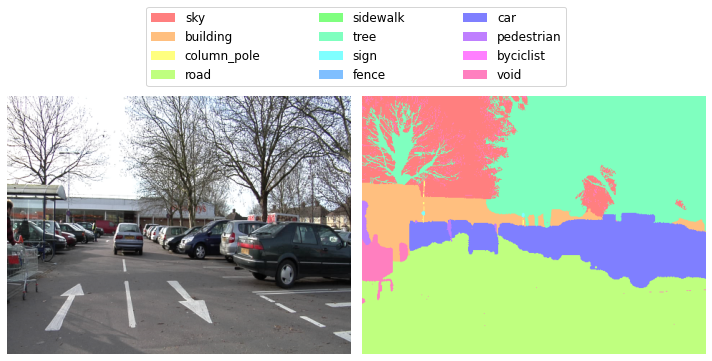

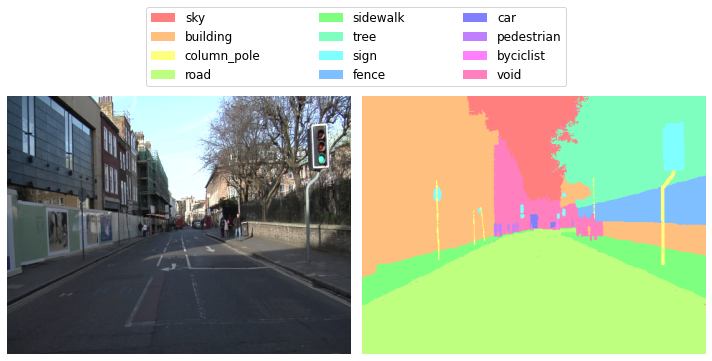

In [2]:
dataset_config = {
    "data_dir": "../data/camvid/train"
}
dataset = CamVidDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(10);
dataset.show_image(26);

In [3]:
dataset.data_distribution_table()

,Number of pixels
sky,10682767.0
building,14750079.0
column_pole,623349.0
road,20076880.0
sidewalk,2845085.0
tree,6166762.0
sign,743859.0
fence,714595.0
car,3719877.0
pedestrian,405385.0


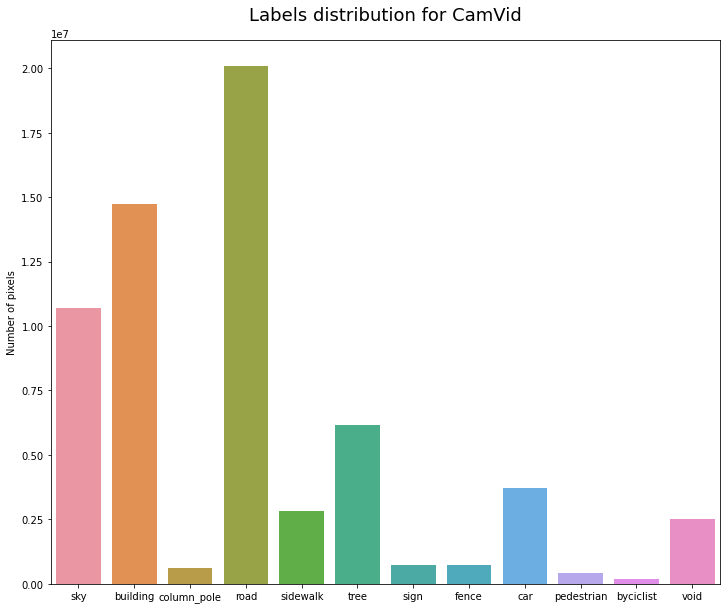

In [4]:
dataset.data_distribution_barchart();

## Load train data

In [3]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "data_dir": "../data/camvid/train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = CamVidDataset(train_dataset_config)

validation_dataset_config = {
    "batch_size": 16,
    "shuffle": False,
    "data_dir": "../data/camvid/val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
validation_dataset = CamVidDataset(validation_dataset_config)

len(train_dataset), len(validation_dataset)

(367, 101)

## Create the model

In [9]:
epochs = 100
model_directory = "./experiments/camvid"
model_config = {
    "num_classes": 12, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [10]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    val_dataset=validation_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2022-10-31 15:09:47,606 INFO Starting training.
training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.99it/s]
2022-10-31 15:09:59,250 INFO epoch: 1, time: 12, loss:  0.63385
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.24it/s]
2022-10-31 15:10:04,992 INFO IOU:0.2675810150997101, IOU mean:0.24165535471666452, IOU per Class:[0.54439872 0.67814861 0.         0.82777337 0.12038385 0.56070781
 0.00365771 0.00625549 0.07226195 0.         0.00103793 0.08523882]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]
2022-10-31 15:10:06,736 INFO IOU:0.26042649895920084, IOU mean:0.22848227664320278, IOU per Class:[3.22198493e-01 7.22091030e-01 0.00000000e+00 7.41229708e-01
 1.88164624e-01 6.65060295e-01 7.22111925e-06 4.46688129e-02
 2.05532185e-02 0.00000000e+00 5.25705571e-03 3.25568620e-02]
training:  


LR 0 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.97it/s]
2022-10-31 15:10:18,479 INFO epoch: 2, time: 12, loss:  0.52602
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.27it/s]
2022-10-31 15:10:22,881 INFO IOU:0.7156341901238128, IOU mean:0.38012972861410915, IOU per Class:[0.79059313 0.77167128 0.         0.91685054 0.48116489 0.6237543
 0.         0.         0.71766703 0.         0.         0.25985557]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]
2022-10-31 15:10:24,841 INFO IOU:0.7097645719029503, IOU mean:0.3786861801495156, IOU per Class:[0.81744449 0.79982155 0.         0.87511011 0.53342352 0.75129783
 0.         0.         0.72153402 0.         0.         0.04560264]
training:   0%|                                                                                  | 0/23 [00:00<


LR 1 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:10:36,751 INFO epoch: 3, time: 12, loss:  0.46107
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.07it/s]
2022-10-31 15:10:41,330 INFO IOU:0.7871528319685753, IOU mean:0.4197462254771345, IOU per Class:[0.87821214 0.84144105 0.         0.94100055 0.55168046 0.72116175
 0.         0.         0.77424366 0.         0.         0.32921509]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]
2022-10-31 15:10:43,118 INFO IOU:0.7578943455519441, IOU mean:0.40945969827059314, IOU per Class:[0.88950628 0.8214817  0.         0.92543564 0.60211638 0.85477563
 0.         0.         0.75281839 0.         0.         0.06738238]
training:   0%|                                                                                  | 0/23 [00:00


LR 2 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.90it/s]
2022-10-31 15:10:55,271 INFO epoch: 4, time: 12, loss:  0.41067
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.81it/s]
2022-10-31 15:11:00,093 INFO IOU:0.8090761766851678, IOU mean:0.438560071927142, IOU per Class:[0.89554207 0.86455898 0.         0.95686431 0.63157211 0.74507157
 0.         0.         0.78637648 0.         0.         0.38273535]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]
2022-10-31 15:11:02,142 INFO IOU:0.769483814959098, IOU mean:0.42919132181698255, IOU per Class:[0.90620382 0.84511114 0.         0.94297821 0.69053923 0.8124254
 0.         0.         0.76074174 0.         0.         0.19229633]
training:   0%|                                                                                  | 0/23 [00:00<?,


LR 3 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:11:14,148 INFO epoch: 5, time: 12, loss:  0.36738
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.04it/s]
2022-10-31 15:11:18,751 INFO IOU:0.829546860345472, IOU mean:0.45636012129309816, IOU per Class:[0.90167169 0.88332334 0.         0.96174945 0.70341873 0.78562729
 0.         0.         0.81801933 0.         0.         0.42251163]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]
2022-10-31 15:11:20,598 INFO IOU:0.7851633172160629, IOU mean:0.4414746819495671, IOU per Class:[0.91324114 0.84566676 0.         0.94555512 0.76492403 0.8711835
 0.         0.         0.78075509 0.         0.         0.17637053]
training:   0%|                                                                                  | 0/23 [00:00<?


LR 4 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.95it/s]
2022-10-31 15:11:32,495 INFO epoch: 6, time: 12, loss:  0.33071
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.03it/s]
2022-10-31 15:11:37,106 INFO IOU:0.8407288133047623, IOU mean:0.4677567014560457, IOU per Class:[0.90772228 0.89239528 0.         0.95968634 0.74309281 0.79351033
 0.         0.         0.86014008 0.         0.         0.45653329]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]
2022-10-31 15:11:38,970 INFO IOU:0.7928507754983076, IOU mean:0.44690958914834367, IOU per Class:[0.92011766 0.84091176 0.         0.94141494 0.7819469  0.87706289
 0.         0.         0.80798104 0.         0.         0.19347987]
training:   0%|                                                                                  | 0/23 [00:00


LR 5 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:11:51,032 INFO epoch: 7, time: 12, loss:  0.29833
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.96it/s]
2022-10-31 15:11:55,706 INFO IOU:0.8521502462255248, IOU mean:0.4758526855497398, IOU per Class:[0.90761958 0.90237894 0.         0.96622462 0.7692707  0.81428862
 0.         0.         0.85976758 0.         0.         0.49068218]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]
2022-10-31 15:11:57,680 INFO IOU:0.8125057383579388, IOU mean:0.45184892098223456, IOU per Class:[0.91881581 0.8517712  0.         0.94728263 0.82513542 0.89218097
 0.         0.         0.81909533 0.         0.         0.16790571]
training:   0%|                                                                                  | 0/23 [00:00


LR 6 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:12:09,746 INFO epoch: 8, time: 12, loss:  0.26961
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.06it/s]
2022-10-31 15:12:14,335 INFO IOU:0.8593598376624907, IOU mean:0.485241185815944, IOU per Class:[0.91348405 0.90708794 0.         0.96833806 0.78271417 0.8224771
 0.01023447 0.         0.87628236 0.         0.         0.54227608]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]
2022-10-31 15:12:16,127 INFO IOU:0.8167285658318888, IOU mean:0.45236745044569465, IOU per Class:[9.25283526e-01 8.53552153e-01 0.00000000e+00 9.48133123e-01
 8.35917512e-01 9.00938686e-01 1.54118826e-04 0.00000000e+00
 8.23616635e-01 0.00000000e+00 0.00000000e+00 1.40813651e-01]
training:   0%|                                                


LR 7 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:12:28,131 INFO epoch: 9, time: 12, loss:  0.24506
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.02it/s]
2022-10-31 15:12:32,742 INFO IOU:0.8650881170690637, IOU mean:0.5034083302390884, IOU per Class:[0.91530978 0.91207848 0.         0.97344602 0.79315409 0.81638863
 0.16834823 0.03868511 0.87639236 0.         0.         0.54709725]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]
2022-10-31 15:12:34,573 INFO IOU:0.8193641104641843, IOU mean:0.4603725818778506, IOU per Class:[0.92416504 0.86075832 0.         0.95488092 0.84140876 0.89015224
 0.08915697 0.00837306 0.84001192 0.         0.         0.11556375]
training:   0%|                                                                                  | 0/23 [00:00<


LR 8 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:12:46,615 INFO epoch: 10, time: 12, loss:  0.22338
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.91it/s]
2022-10-31 15:12:51,341 INFO IOU:0.8749236699293874, IOU mean:0.5624826976670837, IOU per Class:[0.91765217 0.91107319 0.         0.97403829 0.79256266 0.82216491
 0.3465519  0.50643351 0.89221828 0.         0.         0.58709747]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]
2022-10-31 15:12:53,442 INFO IOU:0.8301458936625169, IOU mean:0.5083479762215338, IOU per Class:[0.92620191 0.84178428 0.         0.95774984 0.85052756 0.90272364
 0.21286351 0.39998697 0.84049091 0.         0.         0.16784708]
training:   0%|                                                                                  | 0/23 [00:00


LR 9 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.90it/s]
2022-10-31 15:13:05,609 INFO epoch: 11, time: 12, loss:  0.20464
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.89it/s]
2022-10-31 15:13:11,779 INFO IOU:0.8809186593753388, IOU mean:0.5699364753889689, IOU per Class:[0.9189344  0.91774622 0.         0.97712158 0.81751168 0.8382624
 0.40147614 0.50025994 0.89814092 0.         0.         0.56978442]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]
2022-10-31 15:13:13,751 INFO IOU:0.8287132187515813, IOU mean:0.49075273053451146, IOU per Class:[0.92718295 0.85536479 0.         0.95939091 0.85263898 0.8998373
 0.21770783 0.20863219 0.83571589 0.         0.         0.13256193]
training:   0%|                                                                                  | 0/23 [00:00<


LR 10 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:13:25,776 INFO epoch: 12, time: 12, loss:  0.18798
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.96it/s]
2022-10-31 15:13:30,453 INFO IOU:0.8832711924818049, IOU mean:0.580706859464386, IOU per Class:[0.91898167 0.92104823 0.         0.97781646 0.80724786 0.83229569
 0.39977187 0.6212283  0.89825109 0.         0.         0.59184114]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]
2022-10-31 15:13:32,362 INFO IOU:0.8362557260305977, IOU mean:0.5001836342287431, IOU per Class:[0.92411658 0.86958324 0.         0.95924712 0.84452975 0.8976744
 0.19893896 0.34573751 0.82887582 0.         0.         0.13350023]
training:   0%|                                                                                  | 0/23 [00:00<?


LR 11 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:13:44,364 INFO epoch: 13, time: 12, loss:  0.17412
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.93it/s]
2022-10-31 15:13:49,064 INFO IOU:0.884658962714118, IOU mean:0.5951922228877088, IOU per Class:[0.9198876  0.92158773 0.         0.97824039 0.80858015 0.81860983
 0.45624834 0.7304874  0.89099799 0.         0.         0.61766724]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]
2022-10-31 15:13:51,058 INFO IOU:0.8411071986937766, IOU mean:0.5267676945373563, IOU per Class:[0.92665221 0.85737312 0.         0.96082272 0.85409121 0.898255
 0.24594588 0.58992849 0.80517664 0.         0.         0.18296707]
training:   0%|                                                                                  | 0/23 [00:00<?,


LR 12 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:14:03,208 INFO epoch: 14, time: 12, loss:  0.16145
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:05<00:00,  4.31it/s]
2022-10-31 15:14:08,602 INFO IOU:0.8838907543698533, IOU mean:0.5869805425551846, IOU per Class:[0.91971804 0.92071051 0.         0.97654877 0.76643203 0.85045543
 0.46729963 0.64748443 0.8838367  0.         0.         0.61128097]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]
2022-10-31 15:14:10,711 INFO IOU:0.8299280343128479, IOU mean:0.5080897386531885, IOU per Class:[0.927644   0.85044831 0.         0.96057254 0.83651949 0.8934761
 0.3127702  0.34163157 0.79740194 0.         0.         0.17661271]
training:   0%|                                                                                  | 0/23 [00:00<


LR 13 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:14:22,681 INFO epoch: 15, time: 12, loss:  0.15012
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.01it/s]
2022-10-31 15:14:27,313 INFO IOU:0.8852316038189195, IOU mean:0.5822877360196148, IOU per Class:[0.91950617 0.92683208 0.         0.97855845 0.74394535 0.85038632
 0.42952638 0.62161327 0.89402849 0.         0.         0.62305632]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]
2022-10-31 15:14:29,245 INFO IOU:0.838508461773556, IOU mean:0.51732666589499, IOU per Class:[0.9252605  0.86318008 0.         0.96381037 0.83056854 0.90202826
 0.23563354 0.46106131 0.81944186 0.         0.         0.20693552]
training:   0%|                                                                                  | 0/23 [00:00<?,


LR 14 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:14:41,301 INFO epoch: 16, time: 12, loss:  0.14007
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.04it/s]
2022-10-31 15:14:45,904 INFO IOU:0.8855545816704753, IOU mean:0.585868388142032, IOU per Class:[0.92111717 0.92889056 0.         0.97980336 0.77756705 0.83940158
 0.44584343 0.67844705 0.87964116 0.         0.         0.5797093 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]
2022-10-31 15:14:47,725 INFO IOU:0.8388916191472143, IOU mean:0.5004723845630342, IOU per Class:[0.92763453 0.87096011 0.         0.96340665 0.84062063 0.90023352
 0.22070689 0.37274003 0.80791596 0.         0.         0.10145028]
training:   0%|                                                                                  | 0/23 [00:00<


LR 15 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:14:59,707 INFO epoch: 17, time: 12, loss:  0.13130
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.77it/s]
2022-10-31 15:15:04,572 INFO IOU:0.8874072102792536, IOU mean:0.5917966106056517, IOU per Class:[0.92155926 0.93045195 0.         0.98023716 0.74490846 0.85707817
 0.45276688 0.74679428 0.88114928 0.         0.         0.58661389]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]
2022-10-31 15:15:06,622 INFO IOU:0.8373196805553541, IOU mean:0.5117548838036411, IOU per Class:[0.9287258  0.85622936 0.         0.96509768 0.83092813 0.89932765
 0.23104287 0.53267931 0.80671248 0.         0.         0.09031534]
training:   0%|                                                                                  | 0/23 [00:00


LR 16 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:15:18,709 INFO epoch: 18, time: 12, loss:  0.12326
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.00it/s]
2022-10-31 15:15:23,352 INFO IOU:0.8882566412683865, IOU mean:0.5907838456164337, IOU per Class:[0.92519318 0.93247982 0.         0.98119955 0.76543892 0.84179719
 0.47044681 0.69887456 0.88522137 0.         0.         0.58875474]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]
2022-10-31 15:15:25,122 INFO IOU:0.839593626262029, IOU mean:0.5178128080114326, IOU per Class:[0.92944253 0.86063311 0.         0.96592795 0.83629147 0.89918722
 0.24397881 0.50070377 0.81008798 0.         0.         0.16750087]
training:   0%|                                                                                  | 0/23 [00:00<


LR 17 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:15:37,236 INFO epoch: 19, time: 12, loss:  0.11632
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.68it/s]
2022-10-31 15:15:42,199 INFO IOU:0.8896726765619876, IOU mean:0.5980104008977672, IOU per Class:[0.91639548 0.93471964 0.         0.98102497 0.79871413 0.85297908
 0.52701965 0.69243862 0.86604696 0.         0.         0.60678627]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]
2022-10-31 15:15:44,063 INFO IOU:0.8404182192498655, IOU mean:0.5256397239172591, IOU per Class:[0.92757093 0.86221076 0.         0.96299683 0.84850991 0.90234989
 0.32532218 0.52984238 0.79101352 0.         0.         0.15786028]
training:   0%|                                                                                  | 0/23 [00:00


LR 18 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:15:56,031 INFO epoch: 20, time: 12, loss:  0.11002
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.00it/s]
2022-10-31 15:16:00,673 INFO IOU:0.8885474373249084, IOU mean:0.5895324860030032, IOU per Class:[0.92431366 0.93235599 0.         0.98187763 0.744697   0.84898832
 0.46503177 0.68863842 0.88962246 0.         0.         0.59886457]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]
2022-10-31 15:16:02,604 INFO IOU:0.8376493783961404, IOU mean:0.5133670544929851, IOU per Class:[0.92883251 0.86074966 0.         0.96694673 0.82682002 0.9032682
 0.27055045 0.42447244 0.82196506 0.         0.         0.15679959]
training:   0%|                                                                                  | 0/23 [00:00<


LR 19 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.89it/s]
2022-10-31 15:16:14,997 INFO epoch: 21, time: 12, loss:  0.10418
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.97it/s]
2022-10-31 15:16:21,050 INFO IOU:0.8889754325527542, IOU mean:0.5865138504475765, IOU per Class:[0.92585762 0.93698534 0.         0.98190666 0.76991168 0.83570851
 0.40515339 0.69191743 0.87701198 0.         0.         0.61371359]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.74it/s]
2022-10-31 15:16:22,940 INFO IOU:0.8397657306234378, IOU mean:0.5082931519096795, IOU per Class:[0.92929085 0.87016674 0.         0.96445155 0.82940641 0.8991246
 0.18796766 0.47133884 0.78947112 0.         0.         0.15830006]
training:   0%|                                                                                  | 0/23 [00:00<


LR 20 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:16:35,040 INFO epoch: 22, time: 12, loss:  0.09894
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.98it/s]
2022-10-31 15:16:39,689 INFO IOU:0.8909866613474121, IOU mean:0.5920430404984391, IOU per Class:[0.92690235 0.93611733 0.         0.98236268 0.76364259 0.84514518
 0.4657967  0.67564769 0.88505019 0.         0.         0.62385179]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]
2022-10-31 15:16:41,634 INFO IOU:0.8391755904254373, IOU mean:0.5167129005640073, IOU per Class:[0.93154813 0.86021704 0.         0.96666422 0.83488862 0.90212653
 0.24931639 0.43531242 0.80071214 0.         0.         0.21976931]
training:   0%|                                                                                  | 0/23 [00:00


LR 21 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:16:53,676 INFO epoch: 23, time: 12, loss:  0.09422
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.97it/s]
2022-10-31 15:16:58,336 INFO IOU:0.8900631917799137, IOU mean:0.590793697008585, IOU per Class:[0.92216013 0.93941831 0.         0.98258842 0.72949337 0.85539247
 0.45161802 0.72421587 0.88392065 0.         0.         0.60071713]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]
2022-10-31 15:17:00,122 INFO IOU:0.8390129460040406, IOU mean:0.5185808782280669, IOU per Class:[0.92712268 0.86142201 0.         0.96734196 0.81854676 0.90299327
 0.26565026 0.54331662 0.80976132 0.         0.         0.12681565]
training:   0%|                                                                                  | 0/23 [00:00<


LR 22 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:17:12,097 INFO epoch: 24, time: 12, loss:  0.09006
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.79it/s]
2022-10-31 15:17:16,944 INFO IOU:0.891278105625711, IOU mean:0.5865910714500759, IOU per Class:[9.24911605e-01 9.41123129e-01 0.00000000e+00 9.82122610e-01
 7.74583119e-01 8.63878352e-01 4.38312247e-01 6.76801197e-01
 8.85214158e-01 0.00000000e+00 7.35266291e-04 5.51411173e-01]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]
2022-10-31 15:17:19,047 INFO IOU:0.8373575318653519, IOU mean:0.5067938049488433, IOU per Class:[0.93061028 0.86225631 0.         0.96429787 0.83169283 0.90258745
 0.23584984 0.43802822 0.80763518 0.         0.         0.10856769]
training:   0%|                                               


LR 23 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:17:31,140 INFO epoch: 25, time: 12, loss:  0.08587
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.92it/s]
2022-10-31 15:17:35,859 INFO IOU:0.892141123209859, IOU mean:0.5906043737337975, IOU per Class:[0.92921701 0.9372501  0.         0.98243963 0.76045091 0.86424113
 0.45081508 0.68747599 0.87677811 0.         0.         0.5985845 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]
2022-10-31 15:17:37,699 INFO IOU:0.8365943308896524, IOU mean:0.5092655214221274, IOU per Class:[0.93288354 0.86019261 0.         0.96572636 0.83026488 0.89819898
 0.2509669  0.39627865 0.80019368 0.         0.         0.17648065]
training:   0%|                                                                                  | 0/23 [00:00<


LR 24 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:17:49,710 INFO epoch: 26, time: 12, loss:  0.08235
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.98it/s]
2022-10-31 15:17:54,374 INFO IOU:0.8941932873244958, IOU mean:0.6093197068387323, IOU per Class:[9.26320062e-01 9.41547019e-01 0.00000000e+00 9.83180822e-01
 7.88780835e-01 8.56014451e-01 4.55292439e-01 6.69314422e-01
 8.78970696e-01 4.04553696e-04 2.01489250e-01 6.10521933e-01]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]
2022-10-31 15:17:56,219 INFO IOU:0.838484720438571, IOU mean:0.5194237311017467, IOU per Class:[0.93012831 0.85727444 0.         0.9657249  0.84351867 0.90431634
 0.28538127 0.43410314 0.80281954 0.         0.04486764 0.16495052]
training:   0%|                                               


LR 25 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:18:08,162 INFO epoch: 27, time: 12, loss:  0.07877
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.86it/s]
2022-10-31 15:18:12,944 INFO IOU:0.8953689749467005, IOU mean:0.6135543364557032, IOU per Class:[9.29925251e-01 9.41045368e-01 0.00000000e+00 9.83516816e-01
 7.77523191e-01 8.60942099e-01 4.85900286e-01 7.24299447e-01
 8.69403104e-01 4.93358166e-04 1.73112012e-01 6.16491105e-01]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]
2022-10-31 15:18:14,924 INFO IOU:0.8417136320155397, IOU mean:0.5233840293561363, IOU per Class:[0.93109238 0.86288115 0.         0.96694209 0.84044    0.89926998
 0.28743029 0.4960972  0.78765545 0.         0.03246202 0.1763378 ]
training:   0%|                                              


LR 26 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:18:26,949 INFO epoch: 28, time: 12, loss:  0.07558
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.87it/s]
2022-10-31 15:18:31,717 INFO IOU:0.8959160321527605, IOU mean:0.618526134737053, IOU per Class:[9.27392323e-01 9.42601265e-01 8.02118877e-06 9.83706194e-01
 7.69594462e-01 8.68257844e-01 4.56064366e-01 6.74146443e-01
 8.84851517e-01 7.20301145e-03 2.97866751e-01 6.10621419e-01]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]
2022-10-31 15:18:33,747 INFO IOU:0.8416239154107721, IOU mean:0.5249960903736001, IOU per Class:[0.93185247 0.85870995 0.         0.96737318 0.83976467 0.90718074
 0.24807956 0.38610329 0.81111668 0.00576823 0.15806031 0.185944  ]
training:   0%|                                               


LR 27 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.92it/s]
2022-10-31 15:18:45,822 INFO epoch: 29, time: 12, loss:  0.07269
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.77it/s]
2022-10-31 15:18:50,682 INFO IOU:0.894486974839233, IOU mean:0.6131857097025843, IOU per Class:[9.29011714e-01 9.44827917e-01 6.91426472e-04 9.82522609e-01
 7.18930332e-01 8.69446320e-01 4.64010445e-01 6.95137038e-01
 8.75078169e-01 8.48576045e-04 2.52656732e-01 6.25067237e-01]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]
2022-10-31 15:18:52,623 INFO IOU:0.8386012130857332, IOU mean:0.5215748145538742, IOU per Class:[0.93137663 0.86316905 0.         0.96661936 0.80884291 0.90448992
 0.29515744 0.43755394 0.79345054 0.00104817 0.10034049 0.15684932]
training:   0%|                                               


LR 28 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:19:04,686 INFO epoch: 30, time: 12, loss:  0.07004
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.05it/s]
2022-10-31 15:19:09,280 INFO IOU:0.896381259263409, IOU mean:0.6176117885132962, IOU per Class:[0.92790535 0.94516307 0.00431679 0.98328996 0.7459537  0.87180181
 0.46028333 0.69498083 0.88229814 0.00318709 0.2694658  0.62269559]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]
2022-10-31 15:19:11,135 INFO IOU:0.8385294191917594, IOU mean:0.5182361421799704, IOU per Class:[0.93210416 0.86276915 0.         0.96631313 0.82297475 0.9052262
 0.26437695 0.42088807 0.78563266 0.00967069 0.06876667 0.18011128]
training:   0%|                                                                                  | 0/23 [00:00<?


LR 29 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:19:23,193 INFO epoch: 31, time: 12, loss:  0.06742
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.13it/s]
2022-10-31 15:19:29,086 INFO IOU:0.9005992941757633, IOU mean:0.627088516459016, IOU per Class:[0.92949247 0.94586831 0.00836545 0.98227762 0.81753544 0.87335081
 0.47093622 0.75224436 0.88420591 0.00268878 0.23057513 0.6275217 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]
2022-10-31 15:19:30,857 INFO IOU:0.8428280788275037, IOU mean:0.5331688122751594, IOU per Class:[0.93193763 0.86099969 0.         0.96507155 0.85336613 0.90674098
 0.2903165  0.55234901 0.79900885 0.01150235 0.08064504 0.14608803]
training:   0%|                                                                                  | 0/23 [00:00<


LR 30 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.95it/s]
2022-10-31 15:19:42,751 INFO epoch: 32, time: 12, loss:  0.06518
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.83it/s]
2022-10-31 15:19:47,555 INFO IOU:0.9000554080264205, IOU mean:0.6223194880158122, IOU per Class:[0.92814463 0.94489355 0.00856528 0.98292906 0.8214748  0.87791441
 0.41156569 0.68676081 0.90133886 0.01186955 0.28529736 0.60707985]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]
2022-10-31 15:19:49,654 INFO IOU:0.8439132726705691, IOU mean:0.5239398590603527, IOU per Class:[0.92981863 0.86386781 0.         0.96679997 0.85690781 0.90501552
 0.19112659 0.45660075 0.82652737 0.01556156 0.10421444 0.17083786]
training:   0%|                                                                                  | 0/23 [00:00


LR 31 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:20:01,673 INFO epoch: 33, time: 12, loss:  0.06288
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.95it/s]
2022-10-31 15:20:06,355 INFO IOU:0.9028330449211863, IOU mean:0.6347233228357911, IOU per Class:[0.92889172 0.94411334 0.01288199 0.98334792 0.81073962 0.87914743
 0.45883146 0.7103565  0.90154239 0.         0.31821304 0.66861446]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]
2022-10-31 15:20:08,350 INFO IOU:0.8413009771041967, IOU mean:0.5377737093648591, IOU per Class:[9.31767388e-01 8.51464639e-01 0.00000000e+00 9.67142385e-01
 8.53099452e-01 9.02595261e-01 2.87851096e-01 4.84067834e-01
 8.16930546e-01 1.32122504e-04 1.38822765e-01 2.19411024e-01]
training:   0%|                                              


LR 32 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:20:20,441 INFO epoch: 34, time: 12, loss:  0.06089
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.04it/s]
2022-10-31 15:20:25,046 INFO IOU:0.9017281877611127, IOU mean:0.6290035566954396, IOU per Class:[0.9312204  0.94739272 0.01601348 0.98479866 0.80756134 0.87578455
 0.42890738 0.6722883  0.89991516 0.00355218 0.35923001 0.6213785 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]
2022-10-31 15:20:26,928 INFO IOU:0.8426793418885538, IOU mean:0.5261166492518746, IOU per Class:[0.93178897 0.86154179 0.         0.96751099 0.85090341 0.90353343
 0.2074885  0.35035379 0.823761   0.00969771 0.20069493 0.20612528]
training:   0%|                                                                                  | 0/23 [00:00


LR 33 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:20:38,976 INFO epoch: 35, time: 12, loss:  0.05886
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.86it/s]
2022-10-31 15:20:43,744 INFO IOU:0.9026127994153941, IOU mean:0.6301131092227258, IOU per Class:[0.92531552 0.94796038 0.01654981 0.98461315 0.80439007 0.87928726
 0.48673075 0.69039312 0.89529419 0.00507411 0.26707115 0.6586778 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]
2022-10-31 15:20:45,695 INFO IOU:0.8430226277231594, IOU mean:0.54125265819666, IOU per Class:[0.92658639 0.85958725 0.         0.96610429 0.85058715 0.90533799
 0.31204165 0.4798398  0.80498778 0.00856146 0.17864276 0.20275538]
training:   0%|                                                                                  | 0/23 [00:00<?


LR 34 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.92it/s]
2022-10-31 15:20:57,767 INFO epoch: 36, time: 12, loss:  0.05715
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.93it/s]
2022-10-31 15:21:02,483 INFO IOU:0.9039664030489611, IOU mean:0.6328605048115841, IOU per Class:[0.93055495 0.94836371 0.00897615 0.98473505 0.82474386 0.88164586
 0.43824858 0.70601296 0.90462431 0.00436622 0.33467766 0.62737675]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]
2022-10-31 15:21:04,503 INFO IOU:0.8458823806204473, IOU mean:0.5377008603865646, IOU per Class:[0.93199704 0.86261177 0.         0.96622992 0.85916065 0.90314319
 0.2272394  0.46803639 0.82190688 0.01780996 0.20568902 0.1885861 ]
training:   0%|                                                                                  | 0/23 [00:00


LR 35 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:21:16,611 INFO epoch: 37, time: 12, loss:  0.05528
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.87it/s]
2022-10-31 15:21:21,375 INFO IOU:0.9048929196830815, IOU mean:0.6279433378719329, IOU per Class:[0.93064345 0.94862567 0.01753393 0.98481307 0.8228059  0.88373783
 0.45900687 0.71782451 0.90998878 0.0012482  0.22377509 0.63531678]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]
2022-10-31 15:21:23,309 INFO IOU:0.8441357793112092, IOU mean:0.5298455784525334, IOU per Class:[0.93365107 0.8624438  0.         0.96678285 0.85705182 0.90279213
 0.23730959 0.47840012 0.82903646 0.00351446 0.11640651 0.17075814]
training:   0%|                                                                                  | 0/23 [00:00


LR 36 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:21:35,356 INFO epoch: 38, time: 12, loss:  0.05369
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.10it/s]
2022-10-31 15:21:39,913 INFO IOU:0.9070649593595543, IOU mean:0.6411305257726435, IOU per Class:[0.93348123 0.94801407 0.01805916 0.98527954 0.83860599 0.88005983
 0.46287066 0.75192715 0.90303542 0.02618655 0.28489953 0.66114717]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]
2022-10-31 15:21:41,726 INFO IOU:0.8466804218293948, IOU mean:0.5422296613780074, IOU per Class:[0.93196632 0.86161907 0.         0.96774772 0.86165202 0.90343406
 0.27441928 0.56715134 0.81515494 0.04268228 0.08771264 0.19321626]
training:   0%|                                                                                  | 0/23 [00:00


LR 37 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:21:53,642 INFO epoch: 39, time: 12, loss:  0.05210
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.95it/s]
2022-10-31 15:21:58,333 INFO IOU:0.9074870019807698, IOU mean:0.6417197112093646, IOU per Class:[0.93014074 0.95016701 0.02399955 0.9852177  0.83135522 0.88361918
 0.46151799 0.71570691 0.91176606 0.04103609 0.29949842 0.66661168]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]
2022-10-31 15:22:00,324 INFO IOU:0.8447642630982395, IOU mean:0.5377083668227663, IOU per Class:[0.93292286 0.86224683 0.         0.96790512 0.85877398 0.90410801
 0.255438   0.43149385 0.828582   0.03466153 0.16375356 0.21261466]
training:   0%|                                                                                  | 0/23 [00:00


LR 38 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:22:12,393 INFO epoch: 40, time: 12, loss:  0.05065
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.05it/s]
2022-10-31 15:22:16,991 INFO IOU:0.9079757275581001, IOU mean:0.6485561827316368, IOU per Class:[0.93139855 0.95012981 0.0239375  0.9854742  0.82111043 0.88458357
 0.46359422 0.73898694 0.90657265 0.07777246 0.32491219 0.67420167]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]
2022-10-31 15:22:18,952 INFO IOU:0.8483060809206702, IOU mean:0.5491202824468318, IOU per Class:[0.93170806 0.86560517 0.         0.96678048 0.85471461 0.90962023
 0.2366782  0.54300435 0.80960462 0.10967963 0.14430828 0.21773977]
training:   0%|                                                                                  | 0/23 [00:00


LR 39 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:22:31,005 INFO epoch: 41, time: 12, loss:  0.04941
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.14it/s]
2022-10-31 15:22:37,044 INFO IOU:0.9082763872823697, IOU mean:0.649863290525574, IOU per Class:[0.92987794 0.94966874 0.02234273 0.9854354  0.8206504  0.88753843
 0.48248214 0.71331183 0.89996637 0.08452465 0.32685439 0.69570647]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]
2022-10-31 15:22:38,823 INFO IOU:0.8451055264677267, IOU mean:0.5472530397783327, IOU per Class:[0.92979724 0.86075429 0.         0.96852805 0.86160561 0.90403954
 0.29893806 0.45258017 0.81002793 0.07873331 0.13814712 0.26388516]
training:   0%|                                                                                  | 0/23 [00:00<


LR 40 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.95it/s]
2022-10-31 15:22:50,707 INFO epoch: 42, time: 12, loss:  0.04810
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.06it/s]
2022-10-31 15:22:55,294 INFO IOU:0.9080032368655526, IOU mean:0.6455860178601177, IOU per Class:[0.93453329 0.95063777 0.02353858 0.98535791 0.8274318  0.87017271
 0.46546159 0.75162562 0.91194102 0.07484746 0.27493376 0.6765507 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]
2022-10-31 15:22:57,114 INFO IOU:0.8474904375728625, IOU mean:0.5513623653839982, IOU per Class:[0.93227081 0.86374703 0.         0.9673232  0.85799807 0.90444264
 0.29979656 0.57189376 0.82863843 0.10241831 0.07142304 0.21639653]
training:   0%|                                                                                  | 0/23 [00:00


LR 41 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:23:09,243 INFO epoch: 43, time: 12, loss:  0.04693
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.06it/s]
2022-10-31 15:23:13,833 INFO IOU:0.9097244244560198, IOU mean:0.6428263630303935, IOU per Class:[0.93417888 0.94865916 0.02275927 0.98568078 0.8436734  0.88049359
 0.47070023 0.73449961 0.92073675 0.09417322 0.19355083 0.68481063]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]
2022-10-31 15:23:15,848 INFO IOU:0.8461515487676636, IOU mean:0.5485895599767566, IOU per Class:[0.93324836 0.86158574 0.         0.96589358 0.86068313 0.90803944
 0.30302896 0.55988593 0.84172163 0.08688489 0.02267344 0.23942963]
training:   0%|                                                                                  | 0/23 [00:00


LR 42 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:23:27,925 INFO epoch: 44, time: 12, loss:  0.04576
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.74it/s]
2022-10-31 15:23:32,815 INFO IOU:0.908891855003581, IOU mean:0.6537052667129815, IOU per Class:[0.93306909 0.95039867 0.02584959 0.98554781 0.80923523 0.8820106
 0.48366887 0.74284228 0.91383645 0.12935479 0.30709567 0.68155414]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]
2022-10-31 15:23:34,865 INFO IOU:0.8484311616974535, IOU mean:0.557053160837759, IOU per Class:[0.93388919 0.86504277 0.         0.96760793 0.84761694 0.90987862
 0.30552432 0.55063408 0.82783964 0.13715565 0.1278186  0.2116302 ]
training:   0%|                                                                                  | 0/23 [00:00<?,


LR 43 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:23:46,947 INFO epoch: 45, time: 12, loss:  0.04448
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.04it/s]
2022-10-31 15:23:51,548 INFO IOU:0.9110951154867442, IOU mean:0.6512241641422373, IOU per Class:[0.93443631 0.95191358 0.03098327 0.98522195 0.85454085 0.8894067
 0.47783113 0.72769748 0.91799237 0.14630398 0.24346199 0.65490037]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.91it/s]
2022-10-31 15:23:53,354 INFO IOU:0.849373058690563, IOU mean:0.5487129799767475, IOU per Class:[0.93347619 0.86938999 0.         0.96530758 0.86585229 0.90698561
 0.27162624 0.50092348 0.84346594 0.15465789 0.09181997 0.18105058]
training:   0%|                                                                                  | 0/23 [00:00<?


LR 44 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:24:05,293 INFO epoch: 46, time: 12, loss:  0.04350
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.96it/s]
2022-10-31 15:24:09,974 INFO IOU:0.9110527502661815, IOU mean:0.6618588985352942, IOU per Class:[0.93304959 0.95239773 0.02924244 0.98577705 0.85234341 0.88878172
 0.48658364 0.72871391 0.91792716 0.17119994 0.35579895 0.64049124]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.03it/s]
2022-10-31 15:24:11,723 INFO IOU:0.8507229615891354, IOU mean:0.5600963516194278, IOU per Class:[0.93188288 0.86758175 0.         0.96783995 0.85981485 0.90859086
 0.30912197 0.48690354 0.8461979  0.17960433 0.17381521 0.18980298]
training:   0%|                                                                                  | 0/23 [00:00


LR 45 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:24:23,636 INFO epoch: 47, time: 12, loss:  0.04254
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.04it/s]
2022-10-31 15:24:28,233 INFO IOU:0.9120125302401688, IOU mean:0.6584416829778973, IOU per Class:[0.93461676 0.95279649 0.02733272 0.98630257 0.84039218 0.8858904
 0.45309226 0.74023807 0.92465808 0.20885425 0.27633548 0.67079094]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]
2022-10-31 15:24:30,053 INFO IOU:0.8498816277598431, IOU mean:0.5574266747560851, IOU per Class:[0.9333474  0.8680681  0.         0.9687173  0.86356957 0.90588177
 0.24858818 0.4912567  0.85526236 0.25138638 0.10716395 0.19587838]
training:   0%|                                                                                  | 0/23 [00:00<


LR 46 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.95it/s]
2022-10-31 15:24:41,926 INFO epoch: 48, time: 11, loss:  0.04159
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.86it/s]
2022-10-31 15:24:46,700 INFO IOU:0.9130019628040019, IOU mean:0.6683066686659793, IOU per Class:[0.93500302 0.95257553 0.02791135 0.98596678 0.83087905 0.89047968
 0.47023958 0.76881203 0.93143105 0.22812112 0.33198481 0.66627603]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]
2022-10-31 15:24:48,681 INFO IOU:0.8531337758429001, IOU mean:0.5669276257303739, IOU per Class:[0.93357108 0.86707651 0.         0.96937782 0.86332803 0.90638176
 0.26289884 0.57719572 0.85932119 0.2385029  0.16480406 0.16067361]
training:   0%|                                                                                  | 0/23 [00:00


LR 47 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.92it/s]
2022-10-31 15:25:00,756 INFO epoch: 49, time: 12, loss:  0.04063
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.97it/s]
2022-10-31 15:25:05,431 INFO IOU:0.9133463075159334, IOU mean:0.6645805376632765, IOU per Class:[0.93309572 0.95320941 0.03328133 0.98630324 0.84947623 0.88796777
 0.47991244 0.74287151 0.92603721 0.17628597 0.32445699 0.68206865]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]
2022-10-31 15:25:07,476 INFO IOU:0.8522759132801688, IOU mean:0.5596978285381291, IOU per Class:[0.93285654 0.87045244 0.         0.96904051 0.86665582 0.90624249
 0.27205868 0.52817332 0.84742129 0.18833834 0.13038768 0.20474683]
training:   0%|                                                                                  | 0/23 [00:00


LR 48 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:25:19,605 INFO epoch: 50, time: 12, loss:  0.03978
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.98it/s]
2022-10-31 15:25:24,267 INFO IOU:0.9148881827858953, IOU mean:0.6661937461960167, IOU per Class:[0.93540564 0.95184339 0.02871974 0.98640959 0.86642529 0.89426247
 0.46357433 0.76092313 0.93209094 0.21269215 0.28653938 0.67543889]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]
2022-10-31 15:25:26,368 INFO IOU:0.8500645844718461, IOU mean:0.5606695379246468, IOU per Class:[0.93450093 0.86537711 0.         0.96864273 0.86772207 0.90779951
 0.25526507 0.536702   0.85613596 0.24544442 0.07629393 0.21415074]
training:   0%|                                                                                  | 0/23 [00:00


LR 49 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:25:38,417 INFO epoch: 51, time: 12, loss:  0.03903
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.05it/s]
2022-10-31 15:25:44,356 INFO IOU:0.9159577578522597, IOU mean:0.6688190610010823, IOU per Class:[0.93692304 0.95333893 0.03428059 0.98669849 0.85814407 0.89265561
 0.49008872 0.74940234 0.9311041  0.23221948 0.26999876 0.69097458]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]
2022-10-31 15:25:46,283 INFO IOU:0.8476515447289413, IOU mean:0.5588289970069911, IOU per Class:[0.93415774 0.8636854  0.         0.96852819 0.86928709 0.90364501
 0.26336729 0.50154954 0.85054674 0.267509   0.06983609 0.21383588]
2022-10-31 15:25:46,286 INFO INFO: Early stopping counter 1 of 10
training:   0%|                             


LR 50 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:25:58,264 INFO epoch: 52, time: 12, loss:  0.03820
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.88it/s]
2022-10-31 15:26:03,020 INFO IOU:0.9158802518865433, IOU mean:0.6759071791691286, IOU per Class:[0.93710412 0.95374465 0.04159021 0.9866033  0.85998841 0.89116694
 0.48977298 0.77544046 0.9210851  0.25954524 0.30863845 0.6862063 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]
2022-10-31 15:26:04,882 INFO IOU:0.8510022919158252, IOU mean:0.5666911034721221, IOU per Class:[0.93202439 0.86606731 0.         0.96839144 0.86645817 0.90509854
 0.26066533 0.59864092 0.83437879 0.2930119  0.10311699 0.17243945]
training:   0%|                                                                                  | 0/23 [00:00


LR 51 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:26:16,852 INFO epoch: 53, time: 12, loss:  0.03738
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.04it/s]
2022-10-31 15:26:21,456 INFO IOU:0.9166811567543555, IOU mean:0.6826872221465322, IOU per Class:[0.93551164 0.95368603 0.04083267 0.98670487 0.84617825 0.89315004
 0.52346016 0.77921493 0.92997736 0.21491346 0.38534235 0.7032749 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]
2022-10-31 15:26:23,481 INFO IOU:0.8565527125481813, IOU mean:0.5843618262695541, IOU per Class:[0.93439218 0.87095336 0.         0.96877612 0.86368747 0.90712113
 0.33549054 0.59078628 0.8388198  0.24133222 0.19885948 0.26212332]
training:   0%|                                                                                  | 0/23 [00:00


LR 52 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.89it/s]
2022-10-31 15:26:35,709 INFO epoch: 54, time: 12, loss:  0.03675
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.89it/s]
2022-10-31 15:26:40,445 INFO IOU:0.9169350199360824, IOU mean:0.6842770156334712, IOU per Class:[0.93678507 0.95262081 0.04318994 0.98658674 0.86664435 0.88905348
 0.5282054  0.78218576 0.93881444 0.27496782 0.33741184 0.67485853]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]
2022-10-31 15:26:42,362 INFO IOU:0.8526745301360417, IOU mean:0.5753326474141326, IOU per Class:[0.92922534 0.86788038 0.         0.96868334 0.87006037 0.90477722
 0.32920363 0.56217668 0.86425173 0.2989044  0.13870719 0.17012148]
2022-10-31 15:26:42,364 INFO INFO: Early stopping counter 1 of 10
training:   0%|                             


LR 53 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:26:54,250 INFO epoch: 55, time: 12, loss:  0.03605
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.99it/s]
2022-10-31 15:26:58,896 INFO IOU:0.9158043221463641, IOU mean:0.6732934697163183, IOU per Class:[0.93089136 0.95306447 0.03738032 0.98696852 0.85603652 0.89473148
 0.47412116 0.77223611 0.92482673 0.23240906 0.29989025 0.71696565]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]
2022-10-31 15:27:00,702 INFO IOU:0.8517046393993766, IOU mean:0.5693340841058637, IOU per Class:[0.92965898 0.86692897 0.         0.96901878 0.86609492 0.90675223
 0.2499398  0.58474243 0.84889939 0.26072427 0.09972194 0.2495273 ]
2022-10-31 15:27:00,704 INFO INFO: Early stopping counter 2 of 10
training:   0%|                             


LR 54 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:27:12,559 INFO epoch: 56, time: 12, loss:  0.03553
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.06it/s]
2022-10-31 15:27:17,142 INFO IOU:0.9182876669934275, IOU mean:0.6904519565173243, IOU per Class:[0.93752392 0.95224746 0.06313432 0.98707948 0.86547794 0.89039069
 0.53253063 0.77588786 0.92933279 0.29877551 0.34161868 0.71142419]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]
2022-10-31 15:27:18,897 INFO IOU:0.8516282912510565, IOU mean:0.5822082282801894, IOU per Class:[0.93174432 0.86303028 0.         0.96862475 0.87343158 0.90434719
 0.3453615  0.57378683 0.84702658 0.31483325 0.11618165 0.24813081]
2022-10-31 15:27:18,900 INFO INFO: Early stopping counter 3 of 10
training:   0%|                             


LR 55 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.95it/s]
2022-10-31 15:27:30,721 INFO epoch: 57, time: 12, loss:  0.03457
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.00it/s]
2022-10-31 15:27:35,367 INFO IOU:0.9176676413243927, IOU mean:0.67951974883447, IOU per Class:[0.93749102 0.95483321 0.04308871 0.98676878 0.8592198  0.89088996
 0.4955429  0.75023062 0.9354428  0.25843239 0.3367753  0.70552148]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]
2022-10-31 15:27:37,184 INFO IOU:0.8538266426185533, IOU mean:0.576777545905579, IOU per Class:[0.93366314 0.86666493 0.         0.96756901 0.86238022 0.90738807
 0.26233745 0.56694495 0.85997123 0.24128376 0.21644666 0.23668114]
training:   0%|                                                                                  | 0/23 [00:00<?,


LR 56 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:27:49,146 INFO epoch: 58, time: 12, loss:  0.03400
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.02it/s]
2022-10-31 15:27:53,769 INFO IOU:0.9185234235763008, IOU mean:0.6836236859768955, IOU per Class:[0.93533963 0.95542234 0.04844633 0.98716813 0.86959507 0.89626599
 0.51131805 0.7719569  0.93017112 0.25517284 0.33981345 0.70281439]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]
2022-10-31 15:27:55,598 INFO IOU:0.8538163793515783, IOU mean:0.572627954919368, IOU per Class:[0.93303333 0.86808167 0.         0.9688848  0.86863055 0.90825102
 0.28289523 0.56429676 0.85875419 0.25964546 0.14714809 0.21191436]
training:   0%|                                                                                  | 0/23 [00:00<


LR 57 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:28:07,513 INFO epoch: 59, time: 12, loss:  0.03340
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.14it/s]
2022-10-31 15:28:12,032 INFO IOU:0.9204006399206361, IOU mean:0.6915443684015384, IOU per Class:[0.93808886 0.95588351 0.05345821 0.98724597 0.87574274 0.89296962
 0.52806123 0.79890354 0.93401241 0.27570926 0.34487892 0.71357816]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]
2022-10-31 15:28:13,821 INFO IOU:0.8580722199768284, IOU mean:0.5861962850244832, IOU per Class:[0.93430095 0.87319069 0.         0.96852778 0.87047766 0.90990438
 0.32008332 0.59022107 0.85707494 0.28563776 0.17229208 0.2526448 ]
training:   0%|                                                                                  | 0/23 [00:00


LR 58 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:28:25,838 INFO epoch: 60, time: 12, loss:  0.03289
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.92it/s]
2022-10-31 15:28:30,544 INFO IOU:0.9204682859324841, IOU mean:0.6929556067235314, IOU per Class:[0.9383194  0.95582541 0.0617247  0.9873979  0.87534078 0.89507624
 0.5357585  0.77582328 0.93001527 0.29360912 0.35347967 0.71309702]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]
2022-10-31 15:28:32,391 INFO IOU:0.8541292490820086, IOU mean:0.5825238369713053, IOU per Class:[0.93252862 0.86632022 0.         0.9692467  0.86946031 0.90277105
 0.30742808 0.55233848 0.84978505 0.29165417 0.20377289 0.24498046]
2022-10-31 15:28:32,394 INFO INFO: Early stopping counter 1 of 10
training:   0%|                             


LR 59 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.90it/s]
2022-10-31 15:28:44,473 INFO epoch: 61, time: 12, loss:  0.03231
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.94it/s]
2022-10-31 15:28:50,520 INFO IOU:0.9208815093874523, IOU mean:0.6934779243403156, IOU per Class:[0.93728699 0.95573119 0.04934062 0.98761638 0.88502099 0.89850615
 0.53478334 0.78123314 0.93409367 0.29325766 0.3623172  0.70254777]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]
2022-10-31 15:28:52,826 INFO IOU:0.8538964671205826, IOU mean:0.5809393197884484, IOU per Class:[0.93418725 0.86666298 0.         0.9690946  0.87295197 0.90564676
 0.31851355 0.58151163 0.85593936 0.29733549 0.16309708 0.20633117]
2022-10-31 15:28:52,828 INFO INFO: Early stopping counter 2 of 10
training:   0%|                             


LR 60 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:29:04,894 INFO epoch: 62, time: 12, loss:  0.03167
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.94it/s]
2022-10-31 15:29:09,594 INFO IOU:0.9217408523051277, IOU mean:0.7040324745551674, IOU per Class:[0.93811894 0.95635876 0.07870819 0.98763848 0.87252384 0.89539393
 0.5902463  0.78967353 0.9310578  0.31686359 0.37788858 0.71391774]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]
2022-10-31 15:29:11,577 INFO IOU:0.85839841978433, IOU mean:0.5969922336249857, IOU per Class:[9.32340363e-01 8.72117139e-01 2.94374404e-04 9.69159744e-01
 8.74782303e-01 9.07053867e-01 4.02019064e-01 5.72379042e-01
 8.50875284e-01 2.95179256e-01 2.48681211e-01 2.39025157e-01]
training:   0%|                                                


LR 61 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:29:23,533 INFO epoch: 63, time: 12, loss:  0.03120
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.10it/s]
2022-10-31 15:29:28,082 INFO IOU:0.9212455687869693, IOU mean:0.6986578087142923, IOU per Class:[0.93775689 0.95648603 0.05506566 0.98660996 0.86822124 0.89824335
 0.55166484 0.80044531 0.93171692 0.32234388 0.3549979  0.72034172]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]
2022-10-31 15:29:29,870 INFO IOU:0.8588898058625573, IOU mean:0.5923386854350735, IOU per Class:[0.93439025 0.87357349 0.         0.96916732 0.86931274 0.908087
 0.35117397 0.59615524 0.85324635 0.31644278 0.18935254 0.24716252]
training:   0%|                                                                                  | 0/23 [00:00<?


LR 62 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:29:41,926 INFO epoch: 64, time: 12, loss:  0.03080
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.07it/s]
2022-10-31 15:29:46,499 INFO IOU:0.9227276973469255, IOU mean:0.7056559643539165, IOU per Class:[0.93880552 0.95621809 0.07852309 0.98743371 0.8661102  0.89963332
 0.563519   0.80808349 0.93941784 0.32263709 0.38319397 0.72429625]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]
2022-10-31 15:29:48,450 INFO IOU:0.8563205532357557, IOU mean:0.5967015626295965, IOU per Class:[9.33110100e-01 8.64677422e-01 2.23320780e-04 9.68550403e-01
 8.67119314e-01 9.06860348e-01 3.53071743e-01 6.26669964e-01
 8.66554693e-01 2.88400432e-01 2.63918029e-01 2.21262982e-01]
2022-10-31 15:29:48,453 INFO INFO: Early stopping counter 1 o


LR 63 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.89it/s]
2022-10-31 15:30:00,600 INFO epoch: 65, time: 12, loss:  0.03020
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.69it/s]
2022-10-31 15:30:05,543 INFO IOU:0.9231950554414095, IOU mean:0.7090397428574094, IOU per Class:[0.93706734 0.95645005 0.07655261 0.98737846 0.88597044 0.90107016
 0.57135841 0.79508186 0.92580686 0.36291126 0.37346955 0.7353599 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]
2022-10-31 15:30:07,506 INFO IOU:0.8564343185230507, IOU mean:0.5965750027497573, IOU per Class:[9.33851142e-01 8.66092294e-01 5.07619367e-05 9.69383624e-01
 8.75030125e-01 9.05915861e-01 3.61617562e-01 6.05128313e-01
 8.48421397e-01 3.39093404e-01 2.04299939e-01 2.50015609e-01]
2022-10-31 15:30:07,508 INFO INFO: Early stopping counter 2 o


LR 64 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:30:19,573 INFO epoch: 66, time: 12, loss:  0.02970
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.06it/s]
2022-10-31 15:30:24,163 INFO IOU:0.9234816935449776, IOU mean:0.7044058572865061, IOU per Class:[0.93832878 0.95734769 0.05916896 0.98766294 0.88242017 0.90021776
 0.56831964 0.80437334 0.93257594 0.29233514 0.3942145  0.73590543]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]
2022-10-31 15:30:26,026 INFO IOU:0.8589007970383782, IOU mean:0.5982398122326936, IOU per Class:[0.93405461 0.86847867 0.         0.96954929 0.87551012 0.90620919
 0.34359657 0.61735557 0.85675095 0.28684545 0.26329232 0.257235  ]
training:   0%|                                                                                  | 0/23 [00:00


LR 65 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.90it/s]
2022-10-31 15:30:38,176 INFO epoch: 67, time: 12, loss:  0.02928
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.97it/s]
2022-10-31 15:30:42,843 INFO IOU:0.9242823437562983, IOU mean:0.7156897218720969, IOU per Class:[0.9393329  0.95739849 0.08371412 0.98772239 0.88327612 0.89897947
 0.58257326 0.79986871 0.94056549 0.35225879 0.44447952 0.7181074 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]
2022-10-31 15:30:44,775 INFO IOU:0.8607532086965908, IOU mean:0.6053714037795866, IOU per Class:[9.34357590e-01 8.69916766e-01 1.72585328e-04 9.69557304e-01
 8.74180125e-01 9.07452515e-01 3.56869638e-01 6.03043899e-01
 8.57395284e-01 3.19727947e-01 3.23942397e-01 2.47840796e-01]
training:   0%|                                              


LR 66 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:30:57,015 INFO epoch: 68, time: 13, loss:  0.02880
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.02it/s]
2022-10-31 15:31:01,637 INFO IOU:0.9252951543045927, IOU mean:0.7152554830075388, IOU per Class:[0.93891957 0.95672489 0.08534454 0.9880794  0.88750641 0.89913003
 0.58012809 0.8007736  0.93995622 0.34977873 0.40538697 0.75133735]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]
2022-10-31 15:31:03,830 INFO IOU:0.8544094723088905, IOU mean:0.6009412917166778, IOU per Class:[9.33445461e-01 8.62620826e-01 1.62438197e-04 9.69180550e-01
 8.74842472e-01 9.03157973e-01 3.96177072e-01 5.92533471e-01
 8.56321289e-01 3.36787485e-01 2.23084154e-01 2.62982308e-01]
2022-10-31 15:31:03,833 INFO INFO: Early stopping counter 1 o


LR 67 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:31:15,727 INFO epoch: 69, time: 12, loss:  0.02841
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.96it/s]
2022-10-31 15:31:20,409 INFO IOU:0.9245564245206921, IOU mean:0.7150565223313827, IOU per Class:[0.93941196 0.95763309 0.07877844 0.98800093 0.87808627 0.9005088
 0.5855559  0.80757515 0.94006733 0.34233369 0.43934209 0.72338463]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]
2022-10-31 15:31:22,340 INFO IOU:0.8625203082158193, IOU mean:0.6081663838020507, IOU per Class:[0.93413393 0.87293526 0.00179675 0.97026129 0.8759401  0.9090648
 0.37753556 0.60897538 0.86856878 0.33355209 0.295557   0.24967567]
training:   0%|                                                                                  | 0/23 [00:00<?


LR 68 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:31:34,385 INFO epoch: 70, time: 12, loss:  0.02789
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.94it/s]
2022-10-31 15:31:39,080 INFO IOU:0.9266651075893142, IOU mean:0.7234773142620358, IOU per Class:[0.93982453 0.95707045 0.1017703  0.98832881 0.89394889 0.9013266
 0.60882456 0.80854327 0.94424325 0.39476923 0.40790181 0.73517607]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]
2022-10-31 15:31:41,006 INFO IOU:0.85743527284663, IOU mean:0.6077081626215093, IOU per Class:[9.33414186e-01 8.64271256e-01 9.64036370e-04 9.70257722e-01
 8.77417413e-01 9.05576315e-01 3.88307241e-01 6.25713861e-01
 8.62909368e-01 3.79911741e-01 2.28028259e-01 2.55726552e-01]
2022-10-31 15:31:41,008 INFO INFO: Early stopping counter 1 of 1


LR 69 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:31:53,044 INFO epoch: 71, time: 12, loss:  0.02760
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.08it/s]
2022-10-31 15:31:58,958 INFO IOU:0.9251622453527482, IOU mean:0.7214440631968566, IOU per Class:[0.93933464 0.95741081 0.08861182 0.98811776 0.89495201 0.90140437
 0.55231232 0.80560847 0.93079774 0.40099919 0.46794597 0.72983366]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]
2022-10-31 15:32:00,726 INFO IOU:0.8589671250756722, IOU mean:0.5955865924844949, IOU per Class:[0.9334268  0.87275321 0.00248393 0.96910851 0.87641671 0.90905112
 0.29995782 0.57989809 0.85348884 0.36290727 0.22819167 0.25935515]
2022-10-31 15:32:00,729 INFO INFO: Early stopping counter 2 of 10
training:   0%|                             


LR 70 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.95it/s]
2022-10-31 15:32:12,544 INFO epoch: 72, time: 12, loss:  0.02722
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.06it/s]
2022-10-31 15:32:17,131 INFO IOU:0.9265630689815733, IOU mean:0.7237949535339028, IOU per Class:[0.93787321 0.95724259 0.08635239 0.98836887 0.88934699 0.90039233
 0.62282464 0.82652724 0.94325144 0.35875076 0.4252496  0.74935938]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]
2022-10-31 15:32:19,130 INFO IOU:0.8577248256635785, IOU mean:0.611276337493995, IOU per Class:[0.93461865 0.86208925 0.00157308 0.97025349 0.87570223 0.90715983
 0.43566486 0.61957108 0.86069762 0.33156621 0.27107562 0.26534414]
2022-10-31 15:32:19,133 INFO INFO: Early stopping counter 3 of 10
training:   0%|                              


LR 71 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:32:31,003 INFO epoch: 73, time: 12, loss:  0.02693
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.87it/s]
2022-10-31 15:32:35,765 INFO IOU:0.9273932092464863, IOU mean:0.7321985288259176, IOU per Class:[0.93916293 0.95730025 0.10568752 0.98825738 0.89641714 0.90195121
 0.6227557  0.82159162 0.9438851  0.41488886 0.45699841 0.73748623]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]
2022-10-31 15:32:37,857 INFO IOU:0.8553423076550164, IOU mean:0.6082024619959808, IOU per Class:[0.93556818 0.860714   0.00582591 0.96993545 0.87767977 0.90163732
 0.42266508 0.61221921 0.86479054 0.37687758 0.24130171 0.22921481]
2022-10-31 15:32:37,860 INFO INFO: Early stopping counter 4 of 10
training:   0%|                             


LR 72 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:32:49,852 INFO epoch: 74, time: 12, loss:  0.02641
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.11it/s]
2022-10-31 15:32:54,396 INFO IOU:0.9268920786356764, IOU mean:0.7343647431396754, IOU per Class:[0.94013162 0.95838024 0.1028742  0.98802609 0.88563363 0.90194825
 0.62662763 0.81346676 0.93997084 0.43621135 0.49289508 0.72621123]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]
2022-10-31 15:32:56,197 INFO IOU:0.8605572928480051, IOU mean:0.6174496475277275, IOU per Class:[0.93162933 0.8691531  0.00417566 0.96972649 0.87618072 0.90375892
 0.41064713 0.59947732 0.86522007 0.39890075 0.34276485 0.23776143]
training:   0%|                                                                                  | 0/23 [00:00


LR 73 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.95it/s]
2022-10-31 15:33:08,088 INFO epoch: 75, time: 12, loss:  0.02616
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.08it/s]
2022-10-31 15:33:12,653 INFO IOU:0.9280328309126847, IOU mean:0.7390706439251554, IOU per Class:[0.93996416 0.95907255 0.13515238 0.9886326  0.89349196 0.89892498
 0.61435987 0.82759301 0.9442837  0.43939357 0.4949168  0.73306215]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]
2022-10-31 15:33:14,515 INFO IOU:0.8634911873357557, IOU mean:0.6181062803621017, IOU per Class:[0.93537767 0.8716457  0.00798131 0.97003116 0.87931221 0.90878507
 0.38964478 0.63703883 0.86040957 0.39613024 0.33104419 0.22987463]
training:   0%|                                                                                  | 0/23 [00:00


LR 74 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:33:26,545 INFO epoch: 76, time: 12, loss:  0.02573
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.05it/s]
2022-10-31 15:33:31,144 INFO IOU:0.9287260135198888, IOU mean:0.7419784827721605, IOU per Class:[0.93980438 0.95841186 0.12186349 0.98865041 0.89355014 0.90159214
 0.66174354 0.81660647 0.94146586 0.47838125 0.45819622 0.74347601]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]
2022-10-31 15:33:33,105 INFO IOU:0.858837440779856, IOU mean:0.6189617288741824, IOU per Class:[0.93357095 0.86538906 0.00243541 0.96965543 0.8724425  0.90560469
 0.46309383 0.59597368 0.86409793 0.42342121 0.28636891 0.24548715]
2022-10-31 15:33:33,108 INFO INFO: Early stopping counter 1 of 10
training:   0%|                              


LR 75 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:33:45,087 INFO epoch: 77, time: 12, loss:  0.02542
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.93it/s]
2022-10-31 15:33:49,790 INFO IOU:0.9288608852991339, IOU mean:0.7384904504785204, IOU per Class:[0.94050267 0.95907755 0.10868782 0.98850266 0.89345452 0.89986906
 0.65178866 0.83824611 0.94579745 0.43536216 0.45698406 0.74361269]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]
2022-10-31 15:33:51,610 INFO IOU:0.8623970044846678, IOU mean:0.6203499284308139, IOU per Class:[0.9331639  0.86968571 0.00485452 0.97032801 0.87928216 0.9087442
 0.41078127 0.62193875 0.86293681 0.36262091 0.37110061 0.24876229]
training:   0%|                                                                                  | 0/23 [00:00<


LR 76 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:34:03,537 INFO epoch: 78, time: 12, loss:  0.02513
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.94it/s]
2022-10-31 15:34:08,235 INFO IOU:0.9294577373908225, IOU mean:0.7427892258708337, IOU per Class:[0.94041351 0.95971459 0.11387274 0.98884863 0.89793857 0.90380716
 0.62925616 0.83811    0.94721794 0.46388807 0.49711277 0.73329056]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]
2022-10-31 15:34:10,212 INFO IOU:0.8616834562486239, IOU mean:0.6198680835622127, IOU per Class:[0.93475819 0.86802687 0.00312098 0.96973547 0.87829069 0.90305195
 0.38541512 0.61901377 0.87060578 0.40336798 0.40243305 0.20059715]
2022-10-31 15:34:10,214 INFO INFO: Early stopping counter 1 of 10
training:   0%|                             


LR 77 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:34:22,118 INFO epoch: 79, time: 12, loss:  0.02483
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.09it/s]
2022-10-31 15:34:26,681 INFO IOU:0.9293691036170553, IOU mean:0.7465896430103482, IOU per Class:[0.94031292 0.95930559 0.12328059 0.98859299 0.89673621 0.90525501
 0.62499867 0.83515464 0.94235459 0.49230209 0.51482516 0.73595726]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]
2022-10-31 15:34:28,514 INFO IOU:0.8627114012975662, IOU mean:0.6212517948608923, IOU per Class:[0.93469503 0.87010552 0.00610602 0.97003361 0.88108232 0.90540445
 0.3823676  0.5874438  0.86053482 0.43147672 0.3773996  0.24837204]
training:   0%|                                                                                  | 0/23 [00:00


LR 78 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:34:40,607 INFO epoch: 80, time: 12, loss:  0.02447
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.02it/s]
2022-10-31 15:34:45,225 INFO IOU:0.9306339739562041, IOU mean:0.7546190389156883, IOU per Class:[0.94081925 0.95986686 0.14952012 0.98877866 0.8899304  0.90457222
 0.66056513 0.83359076 0.94599319 0.49908128 0.53444551 0.74826508]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]
2022-10-31 15:34:47,022 INFO IOU:0.8620372605683961, IOU mean:0.6306758995484107, IOU per Class:[0.93388364 0.86761546 0.01189705 0.97057902 0.87509659 0.90376577
 0.44181669 0.57319009 0.86466456 0.42067694 0.42327741 0.28164756]
2022-10-31 15:34:47,025 INFO INFO: Early stopping counter 1 of 10
training:   0%|                             


LR 79 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:34:58,913 INFO epoch: 81, time: 11, loss:  0.02417
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.78it/s]
2022-10-31 15:35:05,124 INFO IOU:0.9308608988822803, IOU mean:0.7497050689670802, IOU per Class:[0.94081655 0.96022615 0.12601657 0.98879475 0.90209663 0.90470399
 0.65263949 0.82698156 0.94710781 0.47571968 0.52157827 0.74977937]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]
2022-10-31 15:35:07,221 INFO IOU:0.8583707748408083, IOU mean:0.6140198013563362, IOU per Class:[0.93342559 0.87014754 0.00801029 0.96953956 0.87685501 0.90345913
 0.45003784 0.57958082 0.86553702 0.38247108 0.2624662  0.26670755]
2022-10-31 15:35:07,224 INFO INFO: Early stopping counter 2 of 10
training:   0%|                             


LR 80 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.90it/s]
2022-10-31 15:35:19,327 INFO epoch: 82, time: 12, loss:  0.02386
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.06it/s]
2022-10-31 15:35:23,916 INFO IOU:0.9315476869474717, IOU mean:0.7540601532506549, IOU per Class:[0.94098674 0.96042403 0.1408071  0.98925905 0.90057587 0.90361521
 0.66277505 0.84496506 0.94799937 0.48073073 0.52422025 0.75236338]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]
2022-10-31 15:35:25,781 INFO IOU:0.8649735052183587, IOU mean:0.6347507712834156, IOU per Class:[0.93479086 0.86934278 0.00744643 0.97115676 0.87813285 0.90600311
 0.45915477 0.60933252 0.86928982 0.40892084 0.43872609 0.26471242]
training:   0%|                                                                                  | 0/23 [00:00


LR 81 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:35:37,741 INFO epoch: 83, time: 12, loss:  0.02358
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.81it/s]
2022-10-31 15:35:42,566 INFO IOU:0.9317648515370137, IOU mean:0.7613582438860321, IOU per Class:[0.94079419 0.96046038 0.14240371 0.989081   0.89715768 0.90448455
 0.68292471 0.85485263 0.94689452 0.53272158 0.54013504 0.74438893]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]
2022-10-31 15:35:44,657 INFO IOU:0.8628472646735259, IOU mean:0.6340579313259536, IOU per Class:[0.93459149 0.86838644 0.00943454 0.96975643 0.87644953 0.90760851
 0.4831931  0.6507095  0.87195782 0.45653291 0.3635604  0.21651451]
2022-10-31 15:35:44,660 INFO INFO: Early stopping counter 1 of 10
training:   0%|                             


LR 82 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.88it/s]
2022-10-31 15:35:56,884 INFO epoch: 84, time: 12, loss:  0.02336
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.11it/s]
2022-10-31 15:36:01,420 INFO IOU:0.9320555428113364, IOU mean:0.7662015053887997, IOU per Class:[0.94057311 0.96013209 0.18516928 0.98878473 0.89164682 0.90567995
 0.67951643 0.8544163  0.94651796 0.53004478 0.55794237 0.75399425]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.91it/s]
2022-10-31 15:36:03,227 INFO IOU:0.8618090131116528, IOU mean:0.6309426893573419, IOU per Class:[0.93444298 0.86728286 0.01193221 0.97015214 0.87541262 0.9058646
 0.45570067 0.64277191 0.86813128 0.43374547 0.37654368 0.22933186]
2022-10-31 15:36:03,230 INFO INFO: Early stopping counter 2 of 10
training:   0%|                              


LR 83 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:36:15,138 INFO epoch: 85, time: 12, loss:  0.02312
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.88it/s]
2022-10-31 15:36:19,886 INFO IOU:0.9320695448832896, IOU mean:0.7623504575623966, IOU per Class:[0.9400744  0.95975691 0.16863882 0.98892551 0.90123494 0.90520209
 0.67306086 0.84948635 0.94773882 0.53076637 0.52956157 0.75375887]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]
2022-10-31 15:36:21,945 INFO IOU:0.861326882478775, IOU mean:0.6297725921301098, IOU per Class:[0.93399357 0.86591338 0.00882609 0.97005658 0.8763936  0.90783326
 0.43705616 0.64346131 0.86819303 0.44909708 0.34449481 0.25195223]
2022-10-31 15:36:21,948 INFO INFO: Early stopping counter 3 of 10
training:   0%|                              


LR 84 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:36:33,977 INFO epoch: 86, time: 12, loss:  0.02281
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.00it/s]
2022-10-31 15:36:38,618 INFO IOU:0.9311247640866305, IOU mean:0.7559340318653024, IOU per Class:[0.93953446 0.95900929 0.14722454 0.98904142 0.90160188 0.90445486
 0.67864689 0.85656353 0.9445564  0.47217074 0.52426457 0.75413979]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]
2022-10-31 15:36:40,450 INFO IOU:0.8600823599468745, IOU mean:0.6263323732885975, IOU per Class:[0.93482566 0.8665179  0.00900545 0.97059502 0.88108342 0.90476384
 0.45554225 0.62332406 0.86261836 0.40647379 0.36144053 0.23979821]
2022-10-31 15:36:40,452 INFO INFO: Early stopping counter 4 of 10
training:   0%|                             


LR 85 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:36:52,341 INFO epoch: 87, time: 12, loss:  0.02262
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.13it/s]
2022-10-31 15:36:56,869 INFO IOU:0.9323315212269662, IOU mean:0.7675103702873106, IOU per Class:[0.94011754 0.95957856 0.1766801  0.98922867 0.90061953 0.90417584
 0.69960045 0.85361763 0.9502509  0.53130093 0.55859083 0.74636345]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]
2022-10-31 15:36:58,684 INFO IOU:0.8599750253999701, IOU mean:0.6361116317922405, IOU per Class:[0.93383597 0.85942705 0.01554906 0.97046321 0.87666363 0.90004106
 0.47966955 0.63108517 0.87238129 0.4408161  0.40097734 0.25243015]
2022-10-31 15:36:58,687 INFO INFO: Early stopping counter 5 of 10
training:   0%|                             


LR 86 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:37:10,664 INFO epoch: 88, time: 12, loss:  0.02244
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.95it/s]
2022-10-31 15:37:15,360 INFO IOU:0.9321848921495257, IOU mean:0.7659392238671643, IOU per Class:[0.93988903 0.95988228 0.1836314  0.98911043 0.89812399 0.90484198
 0.69115181 0.86900297 0.94988596 0.49096943 0.56896736 0.74581405]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]
2022-10-31 15:37:17,237 INFO IOU:0.8670787012729874, IOU mean:0.6408414800757294, IOU per Class:[0.93388928 0.87424583 0.01217272 0.97065083 0.87947527 0.90632467
 0.47341593 0.63576332 0.87076363 0.41488905 0.47627386 0.24223336]
training:   0%|                                                                                  | 0/23 [00:00


LR 87 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:37:29,308 INFO epoch: 89, time: 12, loss:  0.02219
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.88it/s]
2022-10-31 15:37:34,067 INFO IOU:0.9329000406799104, IOU mean:0.7693797024668584, IOU per Class:[0.93990009 0.96015113 0.17089972 0.98900564 0.90217082 0.90482954
 0.69476497 0.85815479 0.94926522 0.53724812 0.56726058 0.75890582]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]
2022-10-31 15:37:36,022 INFO IOU:0.8634178622055384, IOU mean:0.6337715944045811, IOU per Class:[0.93441368 0.87044366 0.01354534 0.97087007 0.88201531 0.90553401
 0.43918102 0.61431569 0.86574144 0.45052551 0.39251863 0.26615479]
2022-10-31 15:37:36,025 INFO INFO: Early stopping counter 1 of 10
training:   0%|                             


LR 88 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:37:47,957 INFO epoch: 90, time: 11, loss:  0.02191
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.02it/s]
2022-10-31 15:37:52,578 INFO IOU:0.9330757089940533, IOU mean:0.7751788985247106, IOU per Class:[0.94141481 0.96035096 0.16990917 0.98919493 0.89263681 0.90280016
 0.70857266 0.85146713 0.94953754 0.57146538 0.60728323 0.75751401]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]
2022-10-31 15:37:54,353 INFO IOU:0.8606667901632175, IOU mean:0.6263362971263118, IOU per Class:[0.93210576 0.87221563 0.01841785 0.97022283 0.87859493 0.90387272
 0.47884482 0.58959247 0.86491972 0.43673434 0.34383298 0.22668152]
2022-10-31 15:37:54,355 INFO INFO: Early stopping counter 2 of 10
training:   0%|                             


LR 89 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.94it/s]
2022-10-31 15:38:06,243 INFO epoch: 91, time: 12, loss:  0.02179
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.12it/s]
2022-10-31 15:38:12,133 INFO IOU:0.9341470904158017, IOU mean:0.77879727053452, IOU per Class:[0.94128974 0.9611933  0.19982809 0.98906011 0.89917214 0.90622045
 0.72022876 0.85116705 0.95049433 0.57487409 0.59539582 0.75664336]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]
2022-10-31 15:38:14,059 INFO IOU:0.8645807223816763, IOU mean:0.6355569306694351, IOU per Class:[0.93408476 0.87181421 0.02434849 0.97087306 0.87890487 0.910047
 0.46021856 0.62820047 0.87247154 0.45650446 0.37670577 0.24250998]
2022-10-31 15:38:14,062 INFO INFO: Early stopping counter 3 of 10
training:   0%|                                 


LR 90 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:38:25,985 INFO epoch: 92, time: 11, loss:  0.02155
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.92it/s]
2022-10-31 15:38:30,694 INFO IOU:0.933558776984556, IOU mean:0.7719552483476914, IOU per Class:[0.94118591 0.96064114 0.17561658 0.98914183 0.90405598 0.90527235
 0.70477647 0.83694394 0.95061279 0.5391076  0.59363927 0.76246911]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]
2022-10-31 15:38:32,522 INFO IOU:0.8590063552064934, IOU mean:0.6314792397771942, IOU per Class:[0.93312396 0.87185882 0.03683419 0.97082993 0.88220101 0.90024533
 0.46243888 0.46075079 0.86812434 0.45285021 0.46283635 0.27565706]
2022-10-31 15:38:32,524 INFO INFO: Early stopping counter 4 of 10
training:   0%|                              


LR 91 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:38:44,542 INFO epoch: 93, time: 12, loss:  0.02141
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.88it/s]
2022-10-31 15:38:49,299 INFO IOU:0.9333350463959779, IOU mean:0.7734742730386047, IOU per Class:[0.94091865 0.96025085 0.19182463 0.98908612 0.90232523 0.90468543
 0.72517381 0.84009622 0.9505211  0.54600192 0.57738893 0.75341838]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]
2022-10-31 15:38:51,269 INFO IOU:0.8583800245654771, IOU mean:0.6254794437633387, IOU per Class:[0.93543567 0.8674318  0.01963129 0.97012127 0.87784713 0.90578982
 0.53474282 0.57064597 0.86346616 0.42780133 0.29702291 0.23581718]
2022-10-31 15:38:51,271 INFO INFO: Early stopping counter 5 of 10
training:   0%|                             


LR 92 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.92it/s]
2022-10-31 15:39:03,275 INFO epoch: 94, time: 12, loss:  0.02126
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.99it/s]
2022-10-31 15:39:07,924 INFO IOU:0.932196934782601, IOU mean:0.7764920178947942, IOU per Class:[0.9404624  0.95882394 0.20835328 0.98868134 0.90216919 0.89904025
 0.72329792 0.83784007 0.9502802  0.54351725 0.61582926 0.74960911]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]
2022-10-31 15:39:09,966 INFO IOU:0.8572064558914545, IOU mean:0.6291126837690891, IOU per Class:[0.93367664 0.8646643  0.02388688 0.97022856 0.87602997 0.89642515
 0.49504431 0.53313905 0.85461499 0.42914128 0.39607216 0.27642893]
2022-10-31 15:39:09,969 INFO INFO: Early stopping counter 6 of 10
training:   0%|                              


LR 93 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.87it/s]
2022-10-31 15:39:22,288 INFO epoch: 95, time: 13, loss:  0.02105
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.69it/s]
2022-10-31 15:39:27,245 INFO IOU:0.9344218430980766, IOU mean:0.778695003132733, IOU per Class:[0.94127637 0.96086389 0.20405289 0.98936114 0.90314848 0.9056931
 0.71110425 0.86314126 0.95130988 0.5602924  0.59375666 0.76033971]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]
2022-10-31 15:39:29,273 INFO IOU:0.863681481495566, IOU mean:0.6410326944329535, IOU per Class:[0.93335876 0.8699716  0.01663177 0.97045245 0.88210197 0.90148414
 0.48708795 0.62548921 0.86288496 0.45537241 0.4224729  0.2650842 ]
2022-10-31 15:39:29,276 INFO INFO: Early stopping counter 7 of 10
training:   0%|                                


LR 94 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.88it/s]
2022-10-31 15:39:41,486 INFO epoch: 96, time: 12, loss:  0.02088
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.07it/s]
2022-10-31 15:39:46,057 INFO IOU:0.9351270591580811, IOU mean:0.7814396503085502, IOU per Class:[0.94133005 0.96160036 0.20544997 0.98955595 0.90363872 0.90710838
 0.71900815 0.87027733 0.95134249 0.56260709 0.60357877 0.76177855]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]
2022-10-31 15:39:48,007 INFO IOU:0.8666628297645974, IOU mean:0.6464165005933303, IOU per Class:[0.93412651 0.87308805 0.01460288 0.9704149  0.88059048 0.90621524
 0.49201272 0.64415672 0.86208193 0.46143318 0.45118326 0.26709212]
training:   0%|                                                                                  | 0/23 [00:00


LR 95 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:12<00:00,  1.91it/s]
2022-10-31 15:40:00,101 INFO epoch: 97, time: 12, loss:  0.02086
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.88it/s]
2022-10-31 15:40:04,853 INFO IOU:0.9354689146326904, IOU mean:0.7812499264130569, IOU per Class:[0.94161533 0.9619903  0.20109495 0.98966971 0.90432669 0.90771962
 0.72140604 0.8697735  0.95201112 0.56210852 0.60099065 0.76229268]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]
2022-10-31 15:40:06,798 INFO IOU:0.8664892506687084, IOU mean:0.6448736066777899, IOU per Class:[0.93463419 0.87390544 0.01538524 0.97024011 0.88000571 0.90567606
 0.49014625 0.63527778 0.86279507 0.46307619 0.44114317 0.26619807]
training:   0%|                                                                                  | 0/23 [00:00


LR 96 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:40:18,770 INFO epoch: 98, time: 12, loss:  0.02074
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.08it/s]
2022-10-31 15:40:23,342 INFO IOU:0.9358135916935791, IOU mean:0.7822293178362166, IOU per Class:[0.94168413 0.96233272 0.212288   0.98979394 0.90610653 0.90781594
 0.71831424 0.86926861 0.95286863 0.56177208 0.6014575  0.76304947]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]
2022-10-31 15:40:25,130 INFO IOU:0.866304919720402, IOU mean:0.6455839508069622, IOU per Class:[0.93419523 0.87352895 0.02203526 0.97041191 0.87982852 0.90583544
 0.49679821 0.63417248 0.86407822 0.46299707 0.43599688 0.26712925]
2022-10-31 15:40:25,132 INFO INFO: Early stopping counter 1 of 10
training:   0%|                              


LR 97 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.95it/s]
2022-10-31 15:40:36,932 INFO epoch: 99, time: 11, loss:  0.02068
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  4.88it/s]
2022-10-31 15:40:41,687 INFO IOU:0.9359631333992855, IOU mean:0.7820719575042153, IOU per Class:[0.94173711 0.96243783 0.20854822 0.9899064  0.90638163 0.90847612
 0.71855211 0.87157166 0.95222578 0.5530058  0.60697757 0.76504326]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]
2022-10-31 15:40:43,584 INFO IOU:0.8666694947448054, IOU mean:0.6466292954966882, IOU per Class:[0.93443835 0.87358966 0.01887304 0.97045327 0.88067608 0.90566484
 0.49205358 0.63839736 0.86228047 0.45949302 0.45287687 0.27075501]
2022-10-31 15:40:43,586 INFO INFO: Early stopping counter 2 of 10
training:   0%|                             


LR 98 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  1.93it/s]
2022-10-31 15:40:55,488 INFO epoch: 100, time: 12, loss:  0.02063
testing on train set: 100%|█████████████████████████████████████████████████████████████| 23/23 [00:04<00:00,  5.10it/s]
2022-10-31 15:41:00,038 INFO IOU:0.9362624867338619, IOU mean:0.7838014074570198, IOU per Class:[0.94178842 0.96267489 0.21438972 0.98996228 0.9070801  0.90867337
 0.72517863 0.87283076 0.95299625 0.56071979 0.60559352 0.76372916]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]
2022-10-31 15:41:01,851 INFO IOU:0.8660041699052626, IOU mean:0.6450461210288015, IOU per Class:[0.93440509 0.87277132 0.01965076 0.97039581 0.88057336 0.90571825
 0.49827085 0.64727237 0.86221197 0.45607612 0.42649291 0.26671463]
2022-10-31 15:41:01,854 INFO INFO: Early stopping counter 3 of 10



LR 99 1e-05


2022-10-31 15:41:04,050 INFO Train loss: [0.5631871874715717, 0.4837380680953449, 0.4284998165489218, 0.38324199206822573, 0.345498299322596, 0.3125297716268077, 0.28258793108794605, 0.25744619023572524, 0.2345866424105148, 0.21440460595837732, 0.19582144611537944, 0.1794100964913901, 0.16699046976559817, 0.15396053496271128, 0.14440421374357365, 0.13347381418342485, 0.12618219694097296, 0.11774212410242096, 0.11449147334540573, 0.10548833660192646, 0.10083481953644298, 0.09682871868240087, 0.09155693820776667, 0.08698793248925611, 0.08291180858170304, 0.08023474225393758, 0.07673903911981012, 0.0730786167430293, 0.07078142833644753, 0.06820954818897741, 0.06608768867212031, 0.0632572251623268, 0.06138598270287955, 0.059791981057347655, 0.05776329366972401, 0.056039865268267465, 0.053902223696094764, 0.05250206396836351, 0.05114160213182992, 0.049468733644371786, 0.04772589420671359, 0.046763954283187435, 0.045726671682960005, 0.04508004533456846, 0.0434830472766541, 0.0423760759245797

## Evalute the model using test data

In [11]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "../data/camvid/test",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = CamVidDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/camvid/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2022-10-31 16:10:50,405 INFO Loading checkpoint ./experiments/camvid/checkpoint.pth.tar
2022-10-31 16:10:51,042 INFO Loaded checkpoint ./experiments/camvid/checkpoint.pth.tar at epoch 101
testing on test set: 100%|██████████████████████████████████████████████████████████████| 59/59 [00:03<00:00, 19.19it/s]


[{'IOU': 0.7961619357025409,
  'IOU mean': 0.55975493767852,
  'IOU per Class': array([0.90043398, 0.79625953, 0.06452442, 0.93402978, 0.7752441 ,
         0.73547835, 0.38352178, 0.28700126, 0.83897628, 0.41638008,
         0.26717429, 0.31803541])}]

## Predictions

2022-10-31 16:52:34,140 INFO Loading checkpoint ./experiments/camvid/checkpoint.pth.tar
2022-10-31 16:52:34,663 INFO Loaded checkpoint ./experiments/camvid/checkpoint.pth.tar at epoch 101


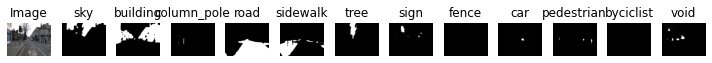

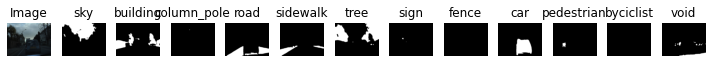

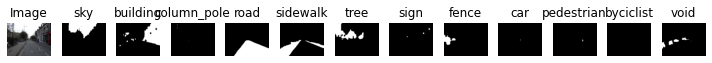

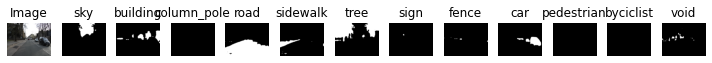

In [13]:
model_path = "./experiments/camvid/checkpoint.pth.tar"
labels = CamVidDataset.labels
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('../data/camvid/test/images/Seq05VD_f02520.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/camvid/test/images/0001TP_009450.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/camvid/test/images/Seq05VD_f01500.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/camvid/test/images/Seq05VD_f00180.png')
fig = model.predict_masks(image, labels, transform)